In [4]:
import pandas as pd
candidates = pd.read_csv("candidates_200.csv")
jobs = pd.read_csv("jobs_200.csv")
print(candidates.head())
print(jobs.head())


   candidate_id         name                                      skills  \
0             1  Candidate_1                 React, MySQL, REST API, CSS   
1             2  Candidate_2  Power BI, Excel, Deep Learning, Statistics   
2             3  Candidate_3      React, Spring, JavaScript, Spring Boot   
3             4  Candidate_4        SQL, Machine Learning, NLP, Power BI   
4             5  Candidate_5             Node.js, MySQL, MongoDB, Spring   

   experience_years          education   location  
0                 1          B.Tech IT      Noida  
1                 4         B.Tech CSE    Chennai  
2                 0      MBA Analytics     Mumbai  
3                 5  B.Sc Data Science  Bangalore  
4                 1          M.Tech AI      Delhi  
   job_id       job_title                          required_skills  \
0    1001  Developer Role        HTML, Node.js, React, Spring Boot   
1    1002       Data Role          Statistics, Excel, Tableau, NLP   
2    1003  Developer 

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bvsru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z, ]', '', text)
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

candidates['profile'] = candidates['skills'] + " " + candidates['education']
candidates['profile'] = candidates['profile'].apply(clean_text)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
all_profiles = list(candidates['profile']) + list(jobs['required_skills'])
tfidf_matrix = vectorizer.fit_transform(all_profiles)


In [7]:
from sklearn.cluster import KMeans

k = 2  # 1 cluster for Data Science, 1 for Web Dev
kmeans = KMeans(n_clusters=k, random_state=42)
candidate_vectors = tfidf_matrix[:len(candidates)]
candidate_labels = kmeans.fit_predict(candidate_vectors)
candidates['cluster'] = candidate_labels


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

job_vectors = tfidf_matrix[len(candidates):]
similarity = cosine_similarity(candidate_vectors, job_vectors)

# Example: top job for each candidate
for i, row in enumerate(similarity):
    top_job_idx = row.argmax()
    print(candidates.loc[i,'name'], "→", jobs.loc[top_job_idx,'job_title'])


Candidate_1 → Developer Role
Candidate_2 → Data Role
Candidate_3 → Developer Role
Candidate_4 → Data Role
Candidate_5 → Developer Role
Candidate_6 → Data Role
Candidate_7 → Developer Role
Candidate_8 → Data Role
Candidate_9 → Developer Role
Candidate_10 → Data Role
Candidate_11 → Developer Role
Candidate_12 → Data Role
Candidate_13 → Developer Role
Candidate_14 → Data Role
Candidate_15 → Developer Role
Candidate_16 → Data Role
Candidate_17 → Developer Role
Candidate_18 → Data Role
Candidate_19 → Developer Role
Candidate_20 → Data Role
Candidate_21 → Developer Role
Candidate_22 → Data Role
Candidate_23 → Developer Role
Candidate_24 → Data Role
Candidate_25 → Developer Role
Candidate_26 → Data Role
Candidate_27 → Developer Role
Candidate_28 → Data Role
Candidate_29 → Developer Role
Candidate_30 → Data Role
Candidate_31 → Developer Role
Candidate_32 → Data Role
Candidate_33 → Developer Role
Candidate_34 → Data Role
Candidate_35 → Developer Role
Candidate_36 → Data Role
Candidate_37 → Deve

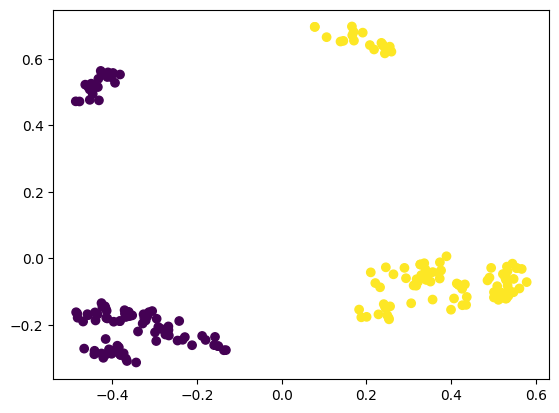

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(candidate_vectors.toarray())
plt.scatter(reduced[:,0], reduced[:,1], c=candidate_labels)
plt.show()
